In [1]:
!pip install surprise pandas numpy scikit-learn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505200 sha256=4290b38016abd189b80574b422e928ca89f989ab51f7103e9adfe3d7720abefa
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [2]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -o ml-100k.zip


--2025-03-24 11:48:41--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  22.4MB/s    in 0.2s    

2025-03-24 11:48:41 (22.4 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base

In [3]:
import pandas as pd

column_names = ['user_id', 'movie_id', 'rating', 'timestamp'] # loading the user movie ratings
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=column_names)

movies = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1', usecols=[0, 1], names=['movie_id', 'title']) #movie titles

df = pd.merge(ratings, movies, on='movie_id') #mergint the datasets
df.head()


,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100000 non-null  int64 
 1   movie_id   100000 non-null  int64 
 2   rating     100000 non-null  int64 
 3   timestamp  100000 non-null  int64 
 4   title      100000 non-null  object
dtypes: int64(4), object(1)
memory usage: 3.8+ MB
None
Number of users: 943, Number of movies: 1682


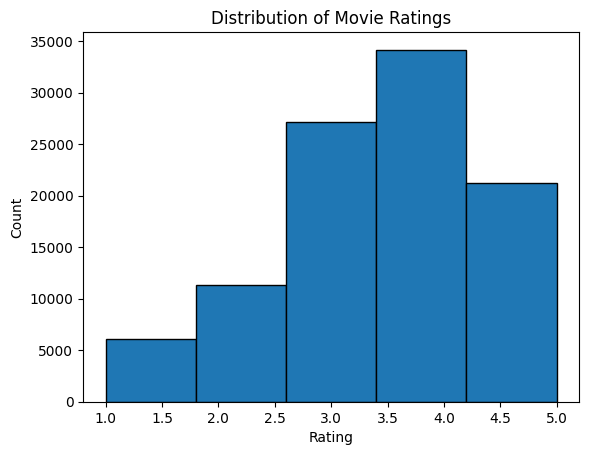

In [4]:
print(df.info())

num_users = df['user_id'].nunique()
num_movies = df['movie_id'].nunique()
print(f"Number of users: {num_users}, Number of movies: {num_movies}")

import matplotlib.pyplot as plt

plt.hist(df['rating'], bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')
plt.show()


In [5]:
df.drop(columns=['timestamp'], inplace=True)
df.head()


,user_id,movie_id,rating,title
0,196,242,3,Kolya (1996)
1,186,302,3,L.A. Confidential (1997)
2,22,377,1,Heavyweights (1994)
3,244,51,2,Legends of the Fall (1994)
4,166,346,1,Jackie Brown (1997)


In [6]:
user_movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating', aggfunc='mean')
user_movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [7]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

user_movie_matrix_filled = user_movie_matrix.fillna(0)

user_similarity = cosine_similarity(user_movie_matrix_filled)# cosine similarity between user

user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)
user_similarity_df.head()


user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.168937,0.048388,0.064561,0.379670,0.429682,0.443097,0.320079,0.078385,0.377733,...,0.372213,0.119860,0.269860,0.193343,0.197949,0.118722,0.315064,0.149086,0.181612,0.399432
2,0.168937,1.000000,0.113393,0.179694,0.073623,0.242106,0.108604,0.104257,0.162470,0.161273,...,0.147095,0.310661,0.363328,0.410725,0.322713,0.231096,0.228793,0.162911,0.175273,0.106732
3,0.048388,0.113393,1.000000,0.349781,0.021592,0.074018,0.067423,0.084419,0.062039,0.066217,...,0.033885,0.043453,0.167140,0.071288,0.126278,0.026758,0.164539,0.102899,0.136757,0.026990
4,0.064561,0.179694,0.349781,1.000000,0.031804,0.068431,0.091507,0.188060,0.101284,0.060859,...,0.054615,0.036784,0.133619,0.196561,0.146058,0.030202,0.196858,0.152041,0.171538,0.058752
5,0.379670,0.073623,0.021592,0.031804,1.000000,0.238636,0.374733,0.248930,0.056847,0.201427,...,0.340183,0.080580,0.095284,0.081053,0.148607,0.071612,0.239955,0.139595,0.153799,0.313941


In [8]:
def get_similar_users(user_id, n=5):#(user, number of similar users)
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:n+1]
    return similar_users

similar_users = get_similar_users(10, 5)
print(similar_users)


user_id
474    0.556142
6      0.554851
234    0.543002
308    0.538171
537    0.533409
Name: 10, dtype: float64


In [9]:
def recommend_movies(user_id, num_recommendations=5):
    similar_users = get_similar_users(user_id, 5)

    similar_users_movies = user_movie_matrix.loc[similar_users.index]#movies rataed by similar users

    movie_scores = similar_users_movies.T.dot(similar_users) / similar_users.sum()# weighted average of ratings given by similar users

    user_rated_movies = user_movie_matrix.loc[user_id].dropna().index#removing already rated movies(watched)
    movie_scores = movie_scores.drop(user_rated_movies, errors='ignore')

    return movie_scores.sort_values(ascending=False).head(num_recommendations)# to find top recommended movies
#sample
recommendations = recommend_movies(10, 5)
print(recommendations)


title
To Catch a Thief (1955)           4.407618
Godfather: Part II, The (1974)    4.401498
Cool Hand Luke (1967)             4.211913
Boot, Das (1981)                  4.205818
To Kill a Mockingbird (1962)      4.204046
dtype: float64


In [10]:
movie_similarity = cosine_similarity(user_movie_matrix_filled.T)#cosine similarity between movies

movie_similarity_df = pd.DataFrame(movie_similarity, index=user_movie_matrix.columns, columns=user_movie_matrix.columns)
movie_similarity_df.head()


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.000000,0.000000,0.024561,0.099561,0.185236,0.159265,0.000000,0.052203,0.000000,0.033326,...,0.000000,0.000000,0.000000,0.027774,0.118840,0.142315,0.029070,0.000000,0.110208,0.000000
1-900 (1994),0.000000,1.000000,0.014139,0.009294,0.007354,0.004702,0.010055,0.067038,0.000000,0.000000,...,0.152499,0.015484,0.000000,0.069284,0.018243,0.023408,0.006694,0.079640,0.042295,0.000000
101 Dalmatians (1996),0.024561,0.014139,1.000000,0.167006,0.061105,0.143878,0.203781,0.225803,0.027642,0.092337,...,0.000000,0.021965,0.030905,0.274877,0.204267,0.101199,0.056976,0.172155,0.045714,0.000000
12 Angry Men (1957),0.099561,0.009294,0.167006,1.000000,0.056822,0.167235,0.304078,0.422506,0.072682,0.394854,...,0.060946,0.016502,0.000000,0.403270,0.259436,0.145519,0.105226,0.038901,0.060101,0.081261
187 (1997),0.185236,0.007354,0.061105,0.056822,1.000000,0.132327,0.042928,0.065060,0.043133,0.027300,...,0.000000,0.141997,0.000000,0.068257,0.067786,0.091293,0.099490,0.025184,0.142667,0.096449


In [11]:
def get_similar_movies(movie_title, n=5):
    similar_movies = movie_similarity_df[movie_title].sort_values(ascending=False)[1:n+1]
    return similar_movies

#sample
similar_movies = get_similar_movies("Toy Story (1995)", 5)
print(similar_movies)


title
Star Wars (1977)                 0.734572
Return of the Jedi (1983)        0.699925
Independence Day (ID4) (1996)    0.689786
Rock, The (1996)                 0.664555
Mission: Impossible (1996)       0.641322
Name: Toy Story (1995), dtype: float64


In [12]:
def recommend_movies_item_based(user_id, num_recommendations=5):
    user_rated_movies = user_movie_matrix.loc[user_id].dropna()#getting already rated movies

    movie_scores = pd.Series(dtype='float64')#movie scores saved

    for movie, rating in user_rated_movies.items():# looping through watched movies and find similar movies
        similar_movies = get_similar_movies(movie, 5)
        movie_scores = pd.concat([movie_scores, similar_movies * rating])

    movie_scores = movie_scores.groupby(movie_scores.index).sum()#removing already watched movies and sorting
    movie_scores = movie_scores.drop(user_rated_movies.index, errors='ignore')

    return movie_scores.sort_values(ascending=False).head(num_recommendations)#give top reccomendations

#sample
recommendations_item_based = recommend_movies_item_based(10, 5)
print(recommendations_item_based)


Back to the Future (1985)            50.164103
Empire Strikes Back, The (1980)      29.267848
Fugitive, The (1993)                 19.844265
E.T. the Extra-Terrestrial (1982)    17.752386
Blade Runner (1982)                  17.300487
dtype: float64
